In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
df=pd.read_csv("Student_Performance.csv")
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [111]:
df.shape

(10000, 6)

In [105]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [106]:
# Always rem. that target variable should be in whole number not decimal number 
df["Performance Index"].astype("int64")

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 10000, dtype: int64

In [112]:
#encoding 
df["Extracurricular Activities"].replace("Yes",1)
df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"No": 0,"Yes":1}).astype(int)
df

C:\Users\ansar\AppData\Local\Temp\ipykernel_20156\1326240805.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"No": 0,"Yes":1}).astype(int)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [113]:
df.isnull().sum()


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [114]:
df.isnull().sum().sum()


np.int64(0)

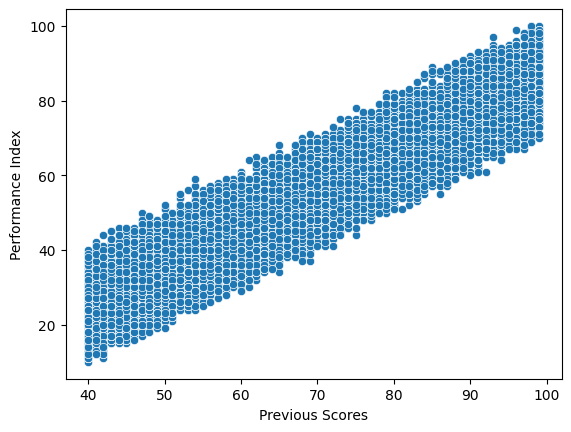

In [115]:
sns.scatterplot(x=df["Previous Scores"],y=df["Performance Index"])
plt.show()

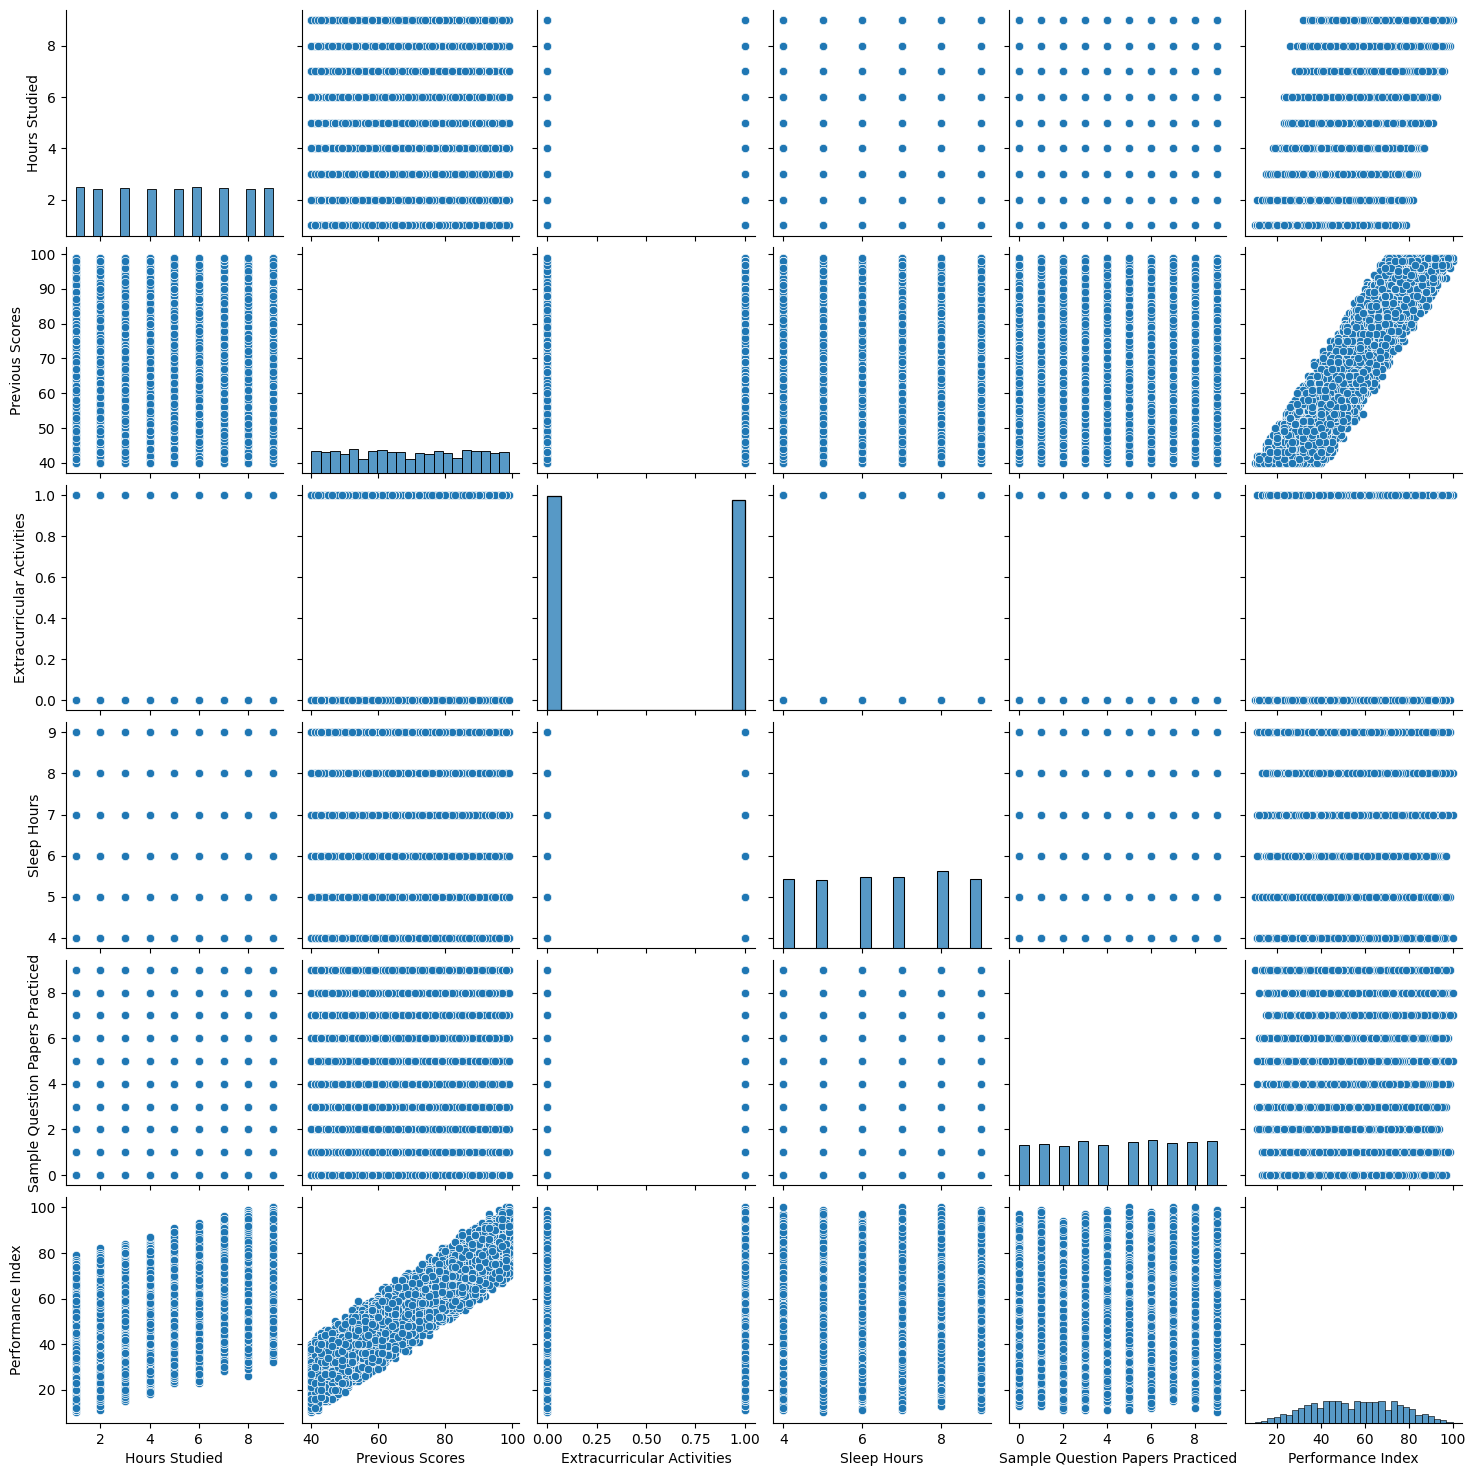

In [116]:
sns.pairplot(df)
plt.show()

# spliting data in x and y 

In [117]:
x=df.iloc[:,:-1]
y=df["Performance Index"]

In [118]:
x.ndim #to check dimension of input variable

2

# feature selection using correlation

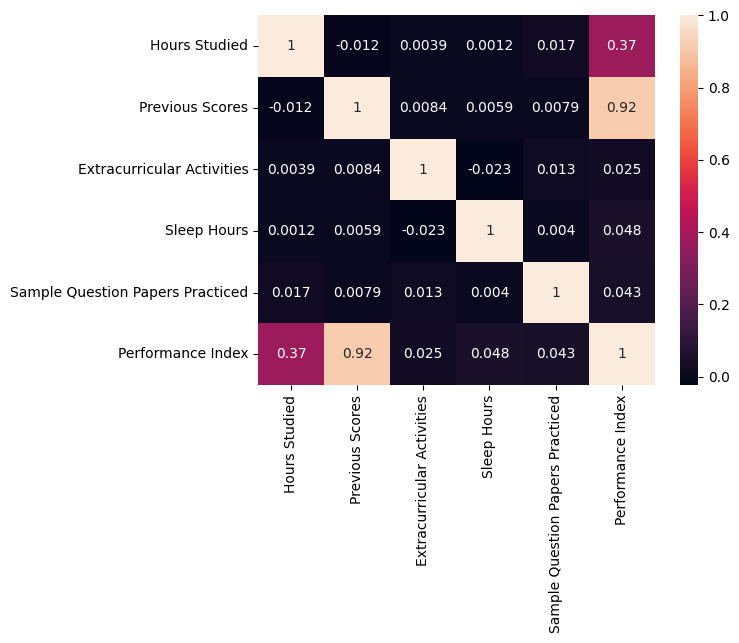

In [120]:
# to show relation use heat map
sns.heatmap(data=df.corr(),annot=True)
plt.show()


In [68]:
x.shape,y.shape

((10000, 5), (10000,))

# x==> input feature and y==> output feature 

# spliting into train and test model 

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [70]:
x_train.shape,y_train.shape

((7500, 5), (7500,))

In [71]:
x_test.shape  , y_test.shape

((2500, 5), (2500,))

# intilizaing model

In [72]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
#Model get trained 

LinearRegression()

In [81]:
y_pred=lr.predict(x_test)
y_pred

array([54.73187888, 22.61211054, 47.90838844, ..., 68.07396952,
       53.68636805, 54.85816372])

In [122]:
lr.score(x_test,y_test)*100

98.90550757439104

# 98% performance build model 

# evalution parametre

In [89]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Score: {r2:.2f}")

Mean Squared Error: 4.03
R-Squared Score: 0.99


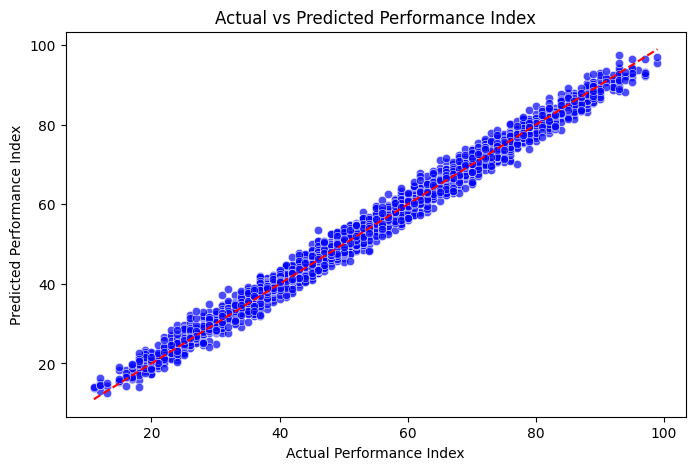

In [95]:
# Scatter Plot for Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Best Fit Line
plt.savefig("StdPerformance.pdf")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index")
plt.show()

In [94]:
print(f"coefficent of x:{lr.coef_}")
print(f"value of intercept:{lr.intercept_}")
print(f" fit intercept is true or false:{lr.fit_intercept}")

coefficent of x:[2.85492123 1.01637916 0.58370931 0.47688351 0.19092346]
value of intercept:-33.86980422343317
 fit intercept is true or false:True
